In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib as mpl
from matplotlib.colors import ListedColormap
from matplotlib.patches import Rectangle
from matplotlib.collections import LineCollection

In [35]:
fluencia = pd.read_csv('totED.csv', sep = ';')
fluencia

,ix,iy,iz,Fluxo
0,0,0,0,0
1,1,0,0,0
2,2,0,0,0
3,3,0,0,0
4,4,0,0,0
...,...,...,...,...
983035,123,127,59,0
983036,124,127,59,0
983037,125,127,59,0
983038,126,127,59,0


In [36]:
metade = [64]
falseortrue = fluencia['ix'].isin(metade)
fluenciaem16 = fluencia[falseortrue]

In [37]:
data = np.zeros((128, 60))

for i in range(60):

  iteradorz = [i]
  fotz = fluenciaem16['iz'].isin(iteradorz)
  fluenciaem16z = fluenciaem16[fotz]

  for k in range(128):
    iteradory = [k]
    foty = fluenciaem16z['iy'].isin(iteradory)
    fluenciaem16zy = fluenciaem16z[foty]
    data[k,i] = fluenciaem16zy['Fluxo']

data



/tmp/ipykernel_777426/1023957602.py:13: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  data[k,i] = fluenciaem16zy['Fluxo']


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

/tmp/ipykernel_777426/372867810.py:1: RuntimeWarning: invalid value encountered in divide
  datan = data/data.max()


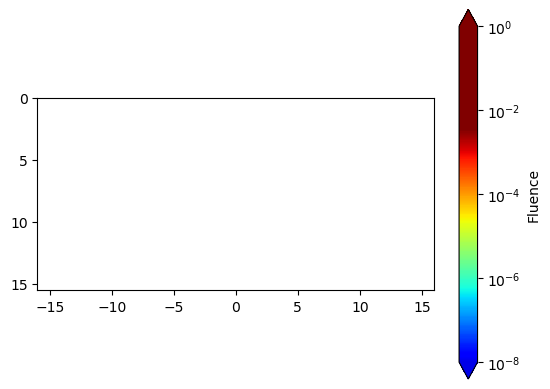

In [38]:
datan = data/data.max()
datan =  np.transpose(datan)
jetmd = mpl.colormaps['jet']
newcmp = ListedColormap(jetmd(np.linspace(0.09, 1.40, 300)))

a = colors.LogNorm(vmin=1.e-8, vmax=1)
fig, ax = plt.subplots()
im = ax.imshow(datan, cmap=newcmp, norm=a, extent=(-16,16,15.5,0))
fig.colorbar(im, ax=ax, label='Fluence', extend='both')